# Análise da formação dos docentes da UFMA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('docentes_-_2020.csv', sep=';').drop(columns=['Unnamed: 4'])
df.head()

,nome,unidade,sexo,titulacao
0,ALANA DAS CHAGAS FERREIRA AGUIAR,DEPARTAMENTO DE BIOLOGIA/CCBS,F,DOUTORADO
1,FREDERICO FERNANDO SOUZA SILVA,DEPARTAMENTO DE ARTES VISUAIS/CCH,M,DOUTORADO
2,ANDREA MARQUES DA SILVA PIRES,DEPARTAMENTO DE PATOLOGIA/CCBS,F,DOUTORADO
3,SARA FITERMAN LIMA,COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,F,DOUTORADO
4,ABIMAELSON SANTOS PEREIRA,DEPARTAMENTO DE ARTES CENICAS/CCH,M,MESTRADO


In [3]:
df['titulacao'].unique()

array(['DOUTORADO', 'MESTRADO', 'ESPECIALIZAÇÃO', 'GRADUAÇÃO',
       'PÓS-DOUTORADO'], dtype=object)

In [4]:
df.shape

(1863, 4)

In [5]:
df_total = df.groupby('titulacao').count()\
                                  .rename(columns={'nome':'Total'})\
                                  .drop(columns=['unidade', 'sexo'])\
                                  .reset_index()\
                                  .sort_values(by='Total', ascending=False)

df_total.index = pd.RangeIndex(start=1, stop=6, step=1)

df_total['Percentual'] = ((df_total['Total'] / df_total['Total'].sum()) * 100).round(2)

df_total

,titulacao,Total,Percentual
1,DOUTORADO,1252,67.20
2,MESTRADO,469,25.17
3,ESPECIALIZAÇÃO,126,6.76
4,GRADUAÇÃO,15,0.81
5,PÓS-DOUTORADO,1,0.05


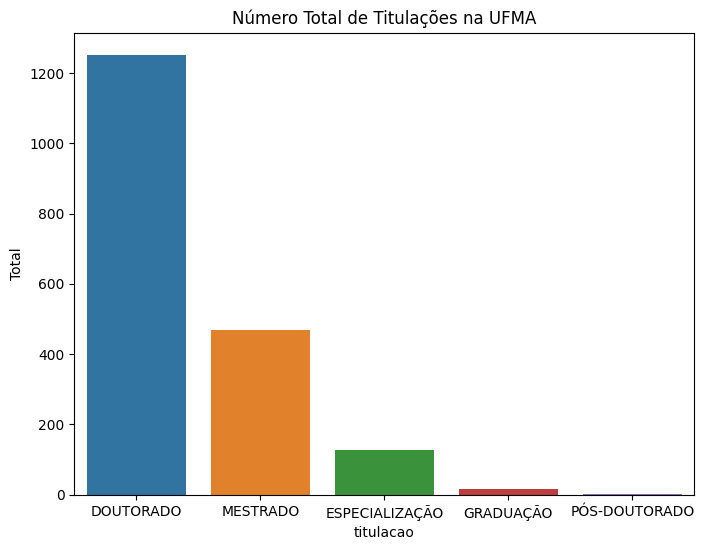

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Número Total de Titulações na UFMA" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_total, ax=ax)

plt.show()

In [7]:
df_sexo = df.groupby('sexo')\
            .count()\
            .rename(columns={'nome':'Total'})\
            .drop(columns=['unidade', 'titulacao'])\
            .reset_index()\
            .sort_values(by='Total', ascending=False)

df_sexo.index = pd.RangeIndex(start=1, stop=3, step=1)

df_sexo['Percentual'] = ((df_sexo['Total'] / df_sexo['Total'].sum()) * 100).round(2)

df_sexo

,sexo,Total,Percentual
1,M,938,50.35
2,F,925,49.65


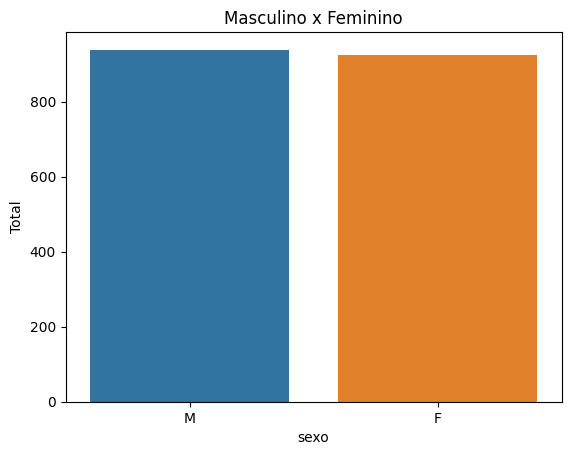

In [8]:
fig, ax = plt.subplots()

ax.set_title( "Masculino x Feminino" , size = 12 )

plot = sns.barplot(x = 'sexo', y = 'Total', data = df_sexo, ax=ax)

plt.show()

In [9]:
df2 = df.groupby(['sexo', 'titulacao'])\
        .count()\
        .rename(columns={'nome':'Total'})\
        .drop(columns=['unidade'])\
        .reset_index()\
        .sort_values(by='Total', ascending=False)

df2.index = pd.RangeIndex(start=1, stop=10, step=1)

df2['Percentual'] = ((df2['Total'] / df2['Total'].sum()) * 100).round(2)

df2

,sexo,titulacao,Total,Percentual
1,M,DOUTORADO,633,33.98
2,F,DOUTORADO,619,33.23
3,F,MESTRADO,235,12.61
4,M,MESTRADO,234,12.56
5,M,ESPECIALIZAÇÃO,64,3.44
6,F,ESPECIALIZAÇÃO,62,3.33
7,F,GRADUAÇÃO,8,0.43
8,M,GRADUAÇÃO,7,0.38
9,F,PÓS-DOUTORADO,1,0.05


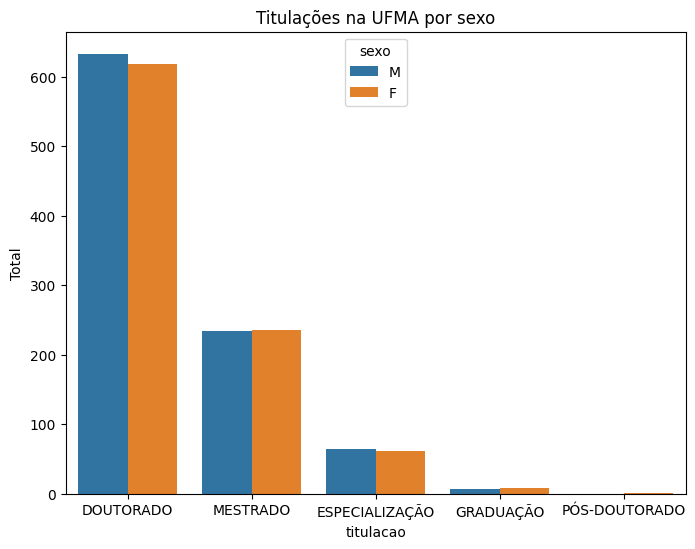

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Titulações na UFMA por sexo" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df2, hue='sexo', ax=ax)

plt.show()

## Matemática

In [11]:
df_mtm = df[df['unidade'] == 'DEPARTAMENTO DE MATEMATICA/CCET'].set_index('unidade')
df_mtm.head(1)

,nome,sexo,titulacao
unidade,,,
DEPARTAMENTO DE MATEMATICA/CCET,GERARD JOHN ALVA MORALES,M,DOUTORADO


In [12]:
df_mtm_titulacao = df_mtm.groupby('titulacao')\
                         .count()\
                         .rename(columns={'nome':'Total'})\
                         .drop(columns=['sexo'])\
                         .reset_index()\
                         .sort_values(by='Total', ascending=False)
    
df_mtm_titulacao.index = pd.RangeIndex(start=1, stop=5, step=1)

df_mtm_titulacao['Percentual'] = ((df_mtm_titulacao['Total'] / df_mtm_titulacao['Total'].sum()) * 100).round(2)

df_mtm_titulacao

,titulacao,Total,Percentual
1,DOUTORADO,21,61.76
2,MESTRADO,10,29.41
3,ESPECIALIZAÇÃO,2,5.88
4,GRADUAÇÃO,1,2.94


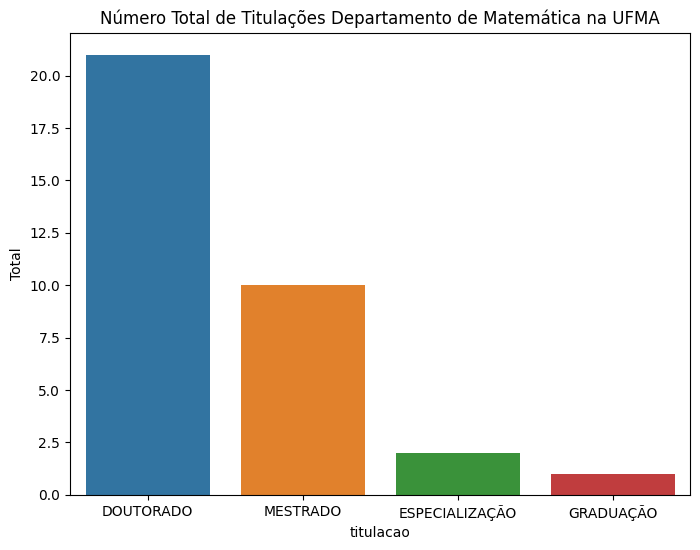

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Número Total de Titulações Departamento de Matemática na UFMA" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_mtm_titulacao, ax=ax)

plt.show()

In [14]:
df_mtm_sexo = df_mtm.groupby('sexo')\
                    .count()\
                    .rename(columns={'nome':'Total'})\
                    .drop(columns=['titulacao'])\
                    .reset_index()\
                    .sort_values(by='Total', ascending=False)

df_mtm_sexo.index = pd.RangeIndex(start=1, stop=3, step=1)

df_mtm_sexo['Percentual'] = ((df_mtm_sexo['Total'] / df_mtm_sexo['Total'].sum()) * 100).round(2)

df_mtm_sexo

,sexo,Total,Percentual
1,M,27,79.41
2,F,7,20.59


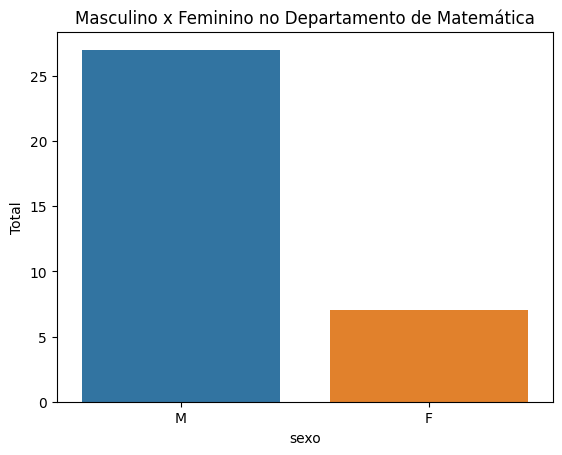

In [15]:
fig, ax = plt.subplots()

ax.set_title( "Masculino x Feminino no Departamento de Matemática" , size = 12 )

plot = sns.barplot(x = 'sexo', y = 'Total', data = df_mtm_sexo, ax=ax)

plt.show()

In [16]:
df_mtm_sexo_titulacao = df_mtm.groupby(['sexo', 'titulacao'])\
                              .count()\
                              .rename(columns={'nome':'Total'})\
                              .reset_index()\
                              .sort_values(by='Total', ascending=False)

df_mtm_sexo_titulacao.index = pd.RangeIndex(start=1, stop=7, step=1)

df_mtm_sexo_titulacao['Percentual'] = ((df_mtm_sexo_titulacao['Total'] / df_mtm_sexo_titulacao['Total']\
                                        .sum()) * 100).round(2)

df_mtm_sexo_titulacao

,sexo,titulacao,Total,Percentual
1,M,DOUTORADO,16,47.06
2,M,MESTRADO,8,23.53
3,F,DOUTORADO,5,14.71
4,F,MESTRADO,2,5.88
5,M,ESPECIALIZAÇÃO,2,5.88
6,M,GRADUAÇÃO,1,2.94


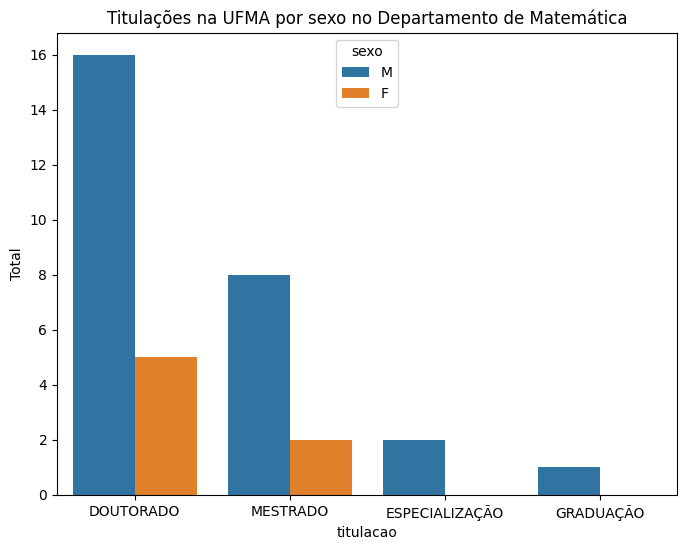

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Titulações na UFMA por sexo no Departamento de Matemática" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_mtm_sexo_titulacao, hue='sexo', ax=ax)

plt.show()

## 4 principais unidadess da UFMA: CCET, CCSO, CCH e CCBS

#### CCET

In [18]:
df_edit = df.set_index('unidade')

df_ccet = df_edit.filter(like='/CCET', axis=0).reset_index()

df_ccet.head()

,unidade,nome,sexo,titulacao
0,DEPARTAMENTO DE FISICA/CCET,MARCO SCHRECK,M,DOUTORADO
1,COORDENACAO DO CURSO DE ENGENHARIA CIVIL/CCET,FELIPE ALEXANDER VARGAS BAZAN,M,DOUTORADO
2,DEPARTAMENTO DE QUIMICA/CCET,MARCO AURELIO SULLER GARCIA,M,DOUTORADO
3,DEPARTAMENTO DE TECNOLOGIA QUIMICA/CCET,LEONARDO TADEU BOAES MENDONCA,M,DOUTORADO
4,DEPARTAMENTO DE MATEMATICA/CCET,GERARD JOHN ALVA MORALES,M,DOUTORADO


In [19]:
df_ccet.shape

(267, 4)

In [20]:
df_ccet_titulacao = df_ccet.groupby('titulacao').count()\
                                                .rename(columns={'nome':'Total'})\
                                                .drop(columns=['unidade', 'sexo'])\
                                                .reset_index()\
                                                .sort_values(by='Total', ascending=False)

df_ccet_titulacao.index = pd.RangeIndex(start=1, stop=5, step=1)

df_ccet_titulacao['Percentual'] = ((df_ccet_titulacao['Total'] / df_ccet_titulacao['Total'].sum()) * 100).round(2)

df_ccet_titulacao

,titulacao,Total,Percentual
1,DOUTORADO,204,76.40
2,MESTRADO,55,20.60
3,ESPECIALIZAÇÃO,7,2.62
4,GRADUAÇÃO,1,0.37


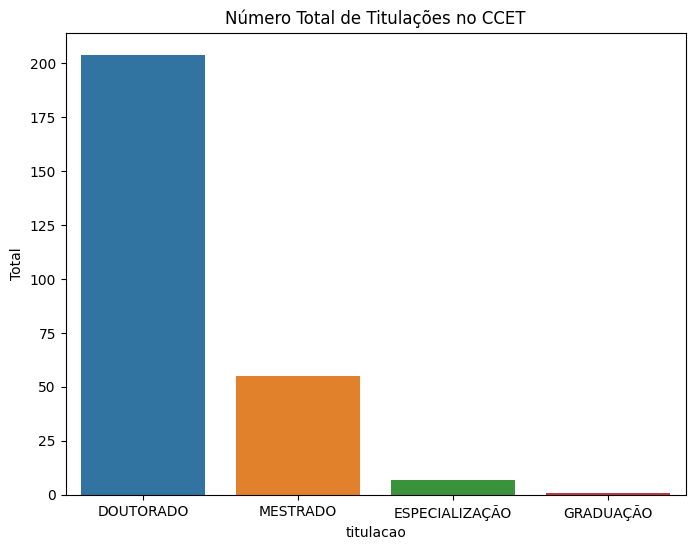

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Número Total de Titulações no CCET" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_ccet_titulacao, ax=ax)

plt.show()

In [22]:
df_ccet_sexo = df_ccet.groupby('sexo')\
                      .count()\
                      .rename(columns={'nome':'Total'})\
                      .drop(columns=['titulacao', 'unidade'])\
                      .reset_index()\
                      .sort_values(by='Total', ascending=False)

df_ccet_sexo.index = pd.RangeIndex(start=1, stop=3, step=1)

df_ccet_sexo['Percentual'] = ((df_ccet_sexo['Total'] / df_ccet_sexo['Total'].sum()) * 100).round(2)

df_ccet_sexo

,sexo,Total,Percentual
1,M,196,73.41
2,F,71,26.59


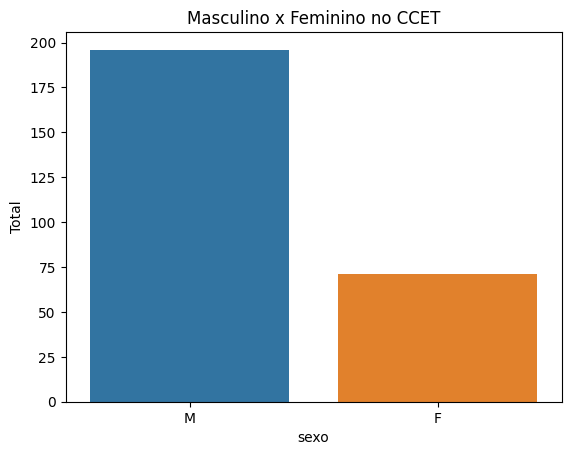

In [23]:
fig, ax = plt.subplots()

ax.set_title( "Masculino x Feminino no CCET" , size = 12 )

plot = sns.barplot(x = 'sexo', y = 'Total', data = df_ccet_sexo, ax=ax)

plt.show()

In [24]:
df_ccet_sexo_titulacao = df_ccet.groupby(['sexo', 'titulacao'])\
                                .count()\
                                .drop(columns=['unidade'])\
                                .rename(columns={'nome':'Total'})\
                                .reset_index()\
                                .sort_values(by='Total', ascending=False)

df_ccet_sexo_titulacao.index = pd.RangeIndex(start=1, stop=8, step=1)

df_ccet_sexo_titulacao['Percentual'] = ((df_ccet_sexo_titulacao['Total'] / df_ccet_sexo_titulacao['Total']\
                                         .sum()) * 100).round(2)

df_ccet_sexo_titulacao

,sexo,titulacao,Total,Percentual
1,M,DOUTORADO,150,56.18
2,F,DOUTORADO,54,20.22
3,M,MESTRADO,40,14.98
4,F,MESTRADO,15,5.62
5,M,ESPECIALIZAÇÃO,5,1.87
6,F,ESPECIALIZAÇÃO,2,0.75
7,M,GRADUAÇÃO,1,0.37


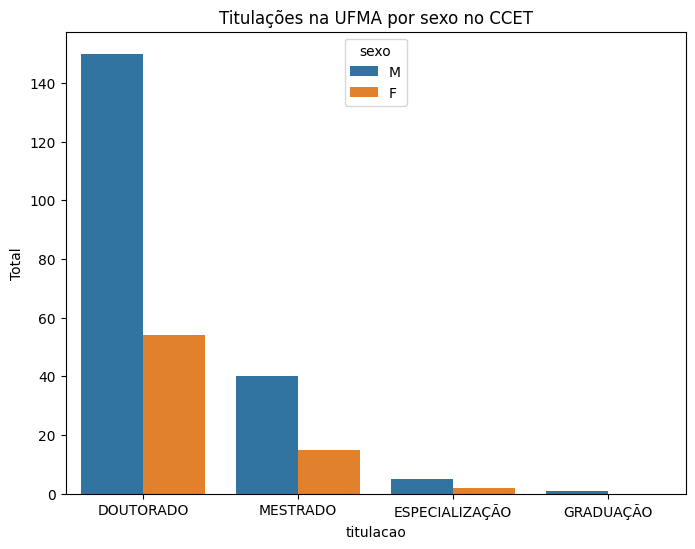

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Titulações na UFMA por sexo no CCET" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_ccet_sexo_titulacao, hue='sexo', ax=ax)

plt.show()

#### CCSO

In [26]:
df_ccso = df_edit.filter(like='/CCSO', axis=0).reset_index()

df_ccso.head(1)

,unidade,nome,sexo,titulacao
0,DEPARTAMENTO DE BIBLIOTECONOMIA/CCSO,MARCIO FERREIRA DA SILVA,M,DOUTORADO


In [27]:
df_ccso.shape

(289, 4)

In [28]:
df_ccso_titulacao = df_ccso.groupby('titulacao').count()\
                                                .rename(columns={'nome':'Total'})\
                                                .drop(columns=['unidade', 'sexo'])\
                                                .reset_index()\
                                                .sort_values(by='Total', ascending=False)

df_ccso_titulacao.index = pd.RangeIndex(start=1, stop=5, step=1)

df_ccso_titulacao['Percentual'] = ((df_ccso_titulacao['Total'] / df_ccso_titulacao['Total'].sum()) * 100).round(2)

df_ccso_titulacao

,titulacao,Total,Percentual
1,DOUTORADO,194,67.13
2,MESTRADO,79,27.34
3,ESPECIALIZAÇÃO,11,3.81
4,GRADUAÇÃO,5,1.73


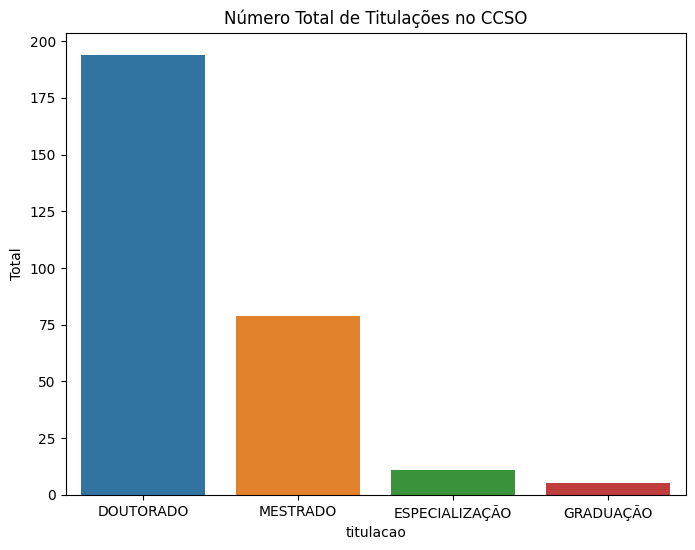

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Número Total de Titulações no CCSO" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_ccso_titulacao, ax=ax)

plt.show()

In [30]:
df_ccso_sexo = df_ccso.groupby('sexo')\
                      .count()\
                      .rename(columns={'nome':'Total'})\
                      .drop(columns=['titulacao', 'unidade'])\
                      .reset_index()\
                      .sort_values(by='Total', ascending=False)

df_ccso_sexo.index = pd.RangeIndex(start=1, stop=3, step=1)

df_ccso_sexo['Percentual'] = ((df_ccso_sexo['Total'] / df_ccso_sexo['Total'].sum()) * 100).round(2)

df_ccso_sexo

,sexo,Total,Percentual
1,F,181,62.63
2,M,108,37.37


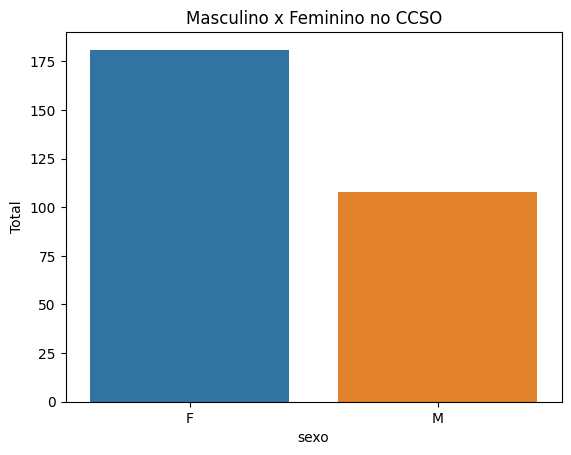

In [31]:
fig, ax = plt.subplots()

ax.set_title( "Masculino x Feminino no CCSO" , size = 12 )

plot = sns.barplot(x = 'sexo', y = 'Total', data = df_ccso_sexo, ax=ax)

plt.show()

In [32]:
df_ccso_sexo_titulacao = df_ccso.groupby(['sexo', 'titulacao'])\
                                .count()\
                                .drop(columns=['unidade'])\
                                .rename(columns={'nome':'Total'})\
                                .reset_index()\
                                .sort_values(by='Total', ascending=False)

df_ccso_sexo_titulacao.index = pd.RangeIndex(start=1, stop=9, step=1)

df_ccso_sexo_titulacao['Percentual'] = ((df_ccso_sexo_titulacao['Total'] / df_ccso_sexo_titulacao['Total']\
                                         .sum()) * 100).round(2)

df_ccso_sexo_titulacao

,sexo,titulacao,Total,Percentual
1,F,DOUTORADO,124,42.91
2,M,DOUTORADO,70,24.22
3,F,MESTRADO,48,16.61
4,M,MESTRADO,31,10.73
5,F,ESPECIALIZAÇÃO,6,2.08
6,M,ESPECIALIZAÇÃO,5,1.73
7,F,GRADUAÇÃO,3,1.04
8,M,GRADUAÇÃO,2,0.69


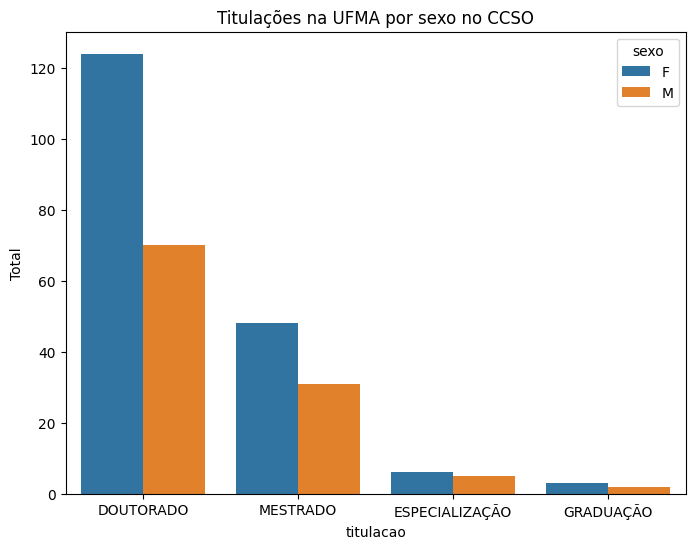

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Titulações na UFMA por sexo no CCSO" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_ccso_sexo_titulacao, hue='sexo', ax=ax)

plt.show()

#### CCBS

In [34]:
df_ccbs = df_edit.filter(like='/CCBS', axis=0).reset_index()

df_ccbs.head()

,unidade,nome,sexo,titulacao
0,DEPARTAMENTO DE BIOLOGIA/CCBS,ALANA DAS CHAGAS FERREIRA AGUIAR,F,DOUTORADO
1,DEPARTAMENTO DE PATOLOGIA/CCBS,ANDREA MARQUES DA SILVA PIRES,F,DOUTORADO
2,DEPARTAMENTO DE MEDICINA III/CCBS,ANA GABRIELA CALDAS OLIVEIRA,F,DOUTORADO
3,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA/CCBS,NAILA ARRAES DE ARAUJO,F,DOUTORADO
4,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA/CCBS,MARCELO HENRIQUE LOPES SILVA,M,DOUTORADO


In [35]:
df_ccbs.shape

(381, 4)

In [36]:
df_ccbs_titulacao = df_ccbs.groupby('titulacao').count()\
                                                .rename(columns={'nome':'Total'})\
                                                .drop(columns=['unidade', 'sexo'])\
                                                .reset_index()\
                                                .sort_values(by='Total', ascending=False)

df_ccbs_titulacao.index = pd.RangeIndex(start=1, stop=5, step=1)

df_ccbs_titulacao['Percentual'] = ((df_ccbs_titulacao['Total'] / df_ccbs_titulacao['Total'].sum()) * 100).round(2)

df_ccbs_titulacao

,titulacao,Total,Percentual
1,DOUTORADO,307,80.58
2,MESTRADO,60,15.75
3,ESPECIALIZAÇÃO,13,3.41
4,GRADUAÇÃO,1,0.26


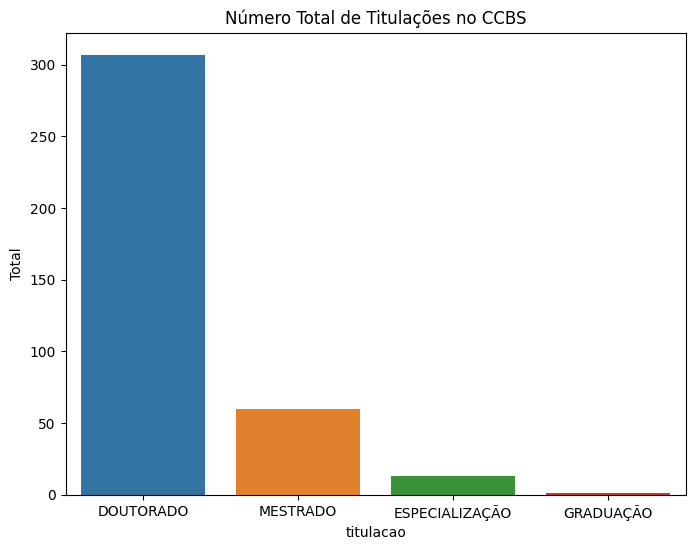

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Número Total de Titulações no CCBS" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_ccbs_titulacao, ax=ax)

plt.show()

In [38]:
df_ccbs_sexo = df_ccbs.groupby('sexo')\
                      .count()\
                      .rename(columns={'nome':'Total'})\
                      .drop(columns=['titulacao', 'unidade'])\
                      .reset_index()\
                      .sort_values(by='Total', ascending=False)

df_ccbs_sexo.index = pd.RangeIndex(start=1, stop=3, step=1)

df_ccbs_sexo['Percentual'] = ((df_ccbs_sexo['Total'] / df_ccbs_sexo['Total'].sum()) * 100).round(2)

df_ccbs_sexo

,sexo,Total,Percentual
1,F,223,58.53
2,M,158,41.47


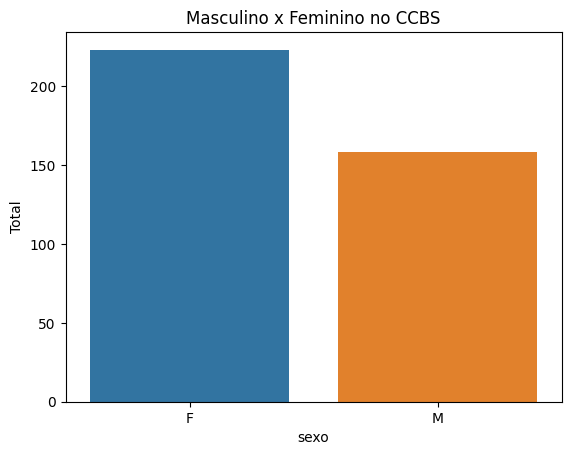

In [39]:
fig, ax = plt.subplots()

ax.set_title( "Masculino x Feminino no CCBS" , size = 12 )

plot = sns.barplot(x = 'sexo', y = 'Total', data = df_ccbs_sexo, ax=ax)

plt.show()

In [40]:
df_ccbs_sexo_titulacao = df_ccbs.groupby(['sexo', 'titulacao'])\
                                .count()\
                                .drop(columns=['unidade'])\
                                .rename(columns={'nome':'Total'})\
                                .reset_index()\
                                .sort_values(by='Total', ascending=False)

df_ccbs_sexo_titulacao.index = pd.RangeIndex(start=1, stop=8, step=1)

df_ccbs_sexo_titulacao['Percentual'] = ((df_ccbs_sexo_titulacao['Total'] / df_ccbs_sexo_titulacao['Total']\
                                         .sum()) * 100).round(2)

df_ccbs_sexo_titulacao

,sexo,titulacao,Total,Percentual
1,F,DOUTORADO,184,48.29
2,M,DOUTORADO,123,32.28
3,F,MESTRADO,32,8.40
4,M,MESTRADO,28,7.35
5,M,ESPECIALIZAÇÃO,7,1.84
6,F,ESPECIALIZAÇÃO,6,1.57
7,F,GRADUAÇÃO,1,0.26


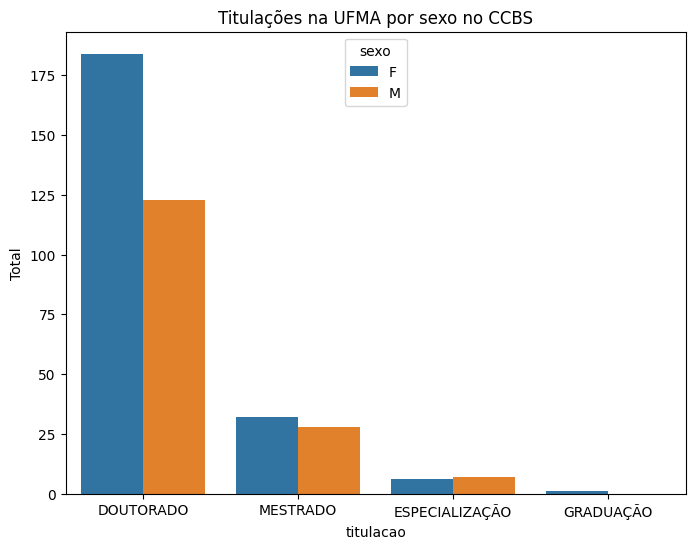

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Titulações na UFMA por sexo no CCBS" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_ccbs_sexo_titulacao, hue='sexo', ax=ax)

plt.show()

#### CCH

In [42]:
df_cch1 = df_edit.filter(like='/CCH', axis=0)

In [43]:
df_cch = df_cch1.drop(['COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST', 
                       'COORDENACAO DO CURSO DE EDUCACAO FISICA PINHEIRO/CCHNST', 
                       'COORDENACAO DO CURSO DE LICENCIATURAS EM CIENCIAS HUMANAS PINHEIRO/CCHNST', 
                       'COORDENACAO DO CURSO DE ENFERMAGEM PINHEIRO/CCHNST', 
                       'COORDENACAO DO CURSO DE ENGENHARIA DE PESCA PINHEIRO/CCHNST', 
                       'COORDENACAO DO CURSO DE LICENCIATURAS EM CIENCIAS NATURAIS PINHEIRO/CCHNST']).reset_index()

df_cch.head()

,unidade,nome,sexo,titulacao
0,DEPARTAMENTO DE ARTES VISUAIS/CCH,FREDERICO FERNANDO SOUZA SILVA,M,DOUTORADO
1,DEPARTAMENTO DE ARTES CENICAS/CCH,ABIMAELSON SANTOS PEREIRA,M,MESTRADO
2,DEPARTAMENTO DE LETRAS/CCH,EDSON REIS MEIRA,M,DOUTORADO
3,DEPARTAMENTO DE FILOSOFIA/CCH,EDERSON SAFRA MELO,M,DOUTORADO
4,DEPARTAMENTO DE FILOSOFIA/CCH,DELVAIR CUSTODIO MOREIRA,M,DOUTORADO


In [44]:
df_cch.shape

(229, 4)

In [45]:
df_cch_titulacao = df_cch.groupby('titulacao').count()\
                                              .rename(columns={'nome':'Total'})\
                                              .drop(columns=['unidade', 'sexo'])\
                                              .reset_index()\
                                              .sort_values(by='Total', ascending=False)

df_cch_titulacao.index = pd.RangeIndex(start=1, stop=6, step=1)

df_cch_titulacao['Percentual'] = ((df_cch_titulacao['Total'] / df_cch_titulacao['Total'].sum()) * 100).round(2)

df_cch_titulacao

,titulacao,Total,Percentual
1,DOUTORADO,172,75.11
2,MESTRADO,46,20.09
3,GRADUAÇÃO,6,2.62
4,ESPECIALIZAÇÃO,4,1.75
5,PÓS-DOUTORADO,1,0.44


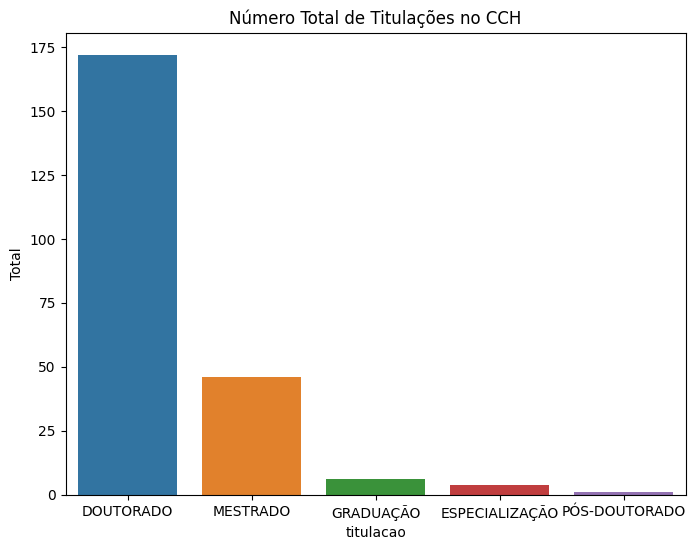

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Número Total de Titulações no CCH" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_cch_titulacao, ax=ax)

plt.show()

In [47]:
df_cch_sexo = df_cch.groupby('sexo')\
                    .count()\
                    .rename(columns={'nome':'Total'})\
                    .drop(columns=['titulacao', 'unidade'])\
                    .reset_index()\
                    .sort_values(by='Total', ascending=False)

df_cch_sexo.index = pd.RangeIndex(start=1, stop=3, step=1)

df_cch_sexo['Percentual'] = ((df_cch_sexo['Total'] / df_cch_sexo['Total'].sum()) * 100).round(2)

df_cch_sexo

,sexo,Total,Percentual
1,F,121,52.84
2,M,108,47.16


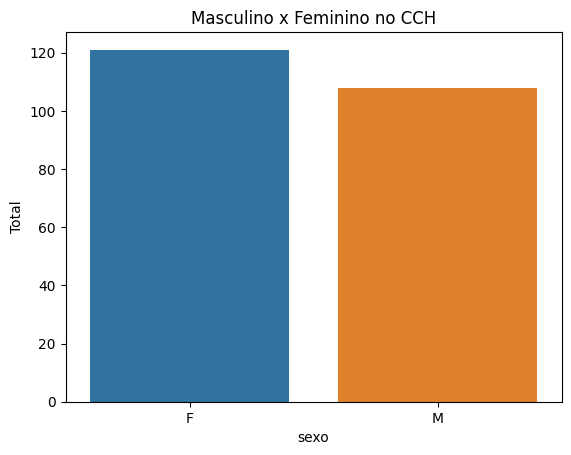

In [48]:
fig, ax = plt.subplots()

ax.set_title( "Masculino x Feminino no CCH" , size = 12 )

plot = sns.barplot(x = 'sexo', y = 'Total', data = df_cch_sexo, ax=ax)

plt.show()

In [49]:
df_cch_sexo_titulacao = df_cch.groupby(['sexo', 'titulacao'])\
                              .count()\
                              .drop(columns=['unidade'])\
                              .rename(columns={'nome':'Total'})\
                              .reset_index()\
                              .sort_values(by='Total', ascending=False)

df_cch_sexo_titulacao.index = pd.RangeIndex(start=1, stop=10, step=1)

df_cch_sexo_titulacao['Percentual'] = ((df_cch_sexo_titulacao['Total'] / df_cch_sexo_titulacao['Total']\
                                        .sum()) * 100).round(2)

df_cch_sexo_titulacao

,sexo,titulacao,Total,Percentual
1,F,DOUTORADO,89,38.86
2,M,DOUTORADO,83,36.24
3,F,MESTRADO,28,12.23
4,M,MESTRADO,18,7.86
5,M,GRADUAÇÃO,4,1.75
6,M,ESPECIALIZAÇÃO,3,1.31
7,F,GRADUAÇÃO,2,0.87
8,F,ESPECIALIZAÇÃO,1,0.44
9,F,PÓS-DOUTORADO,1,0.44


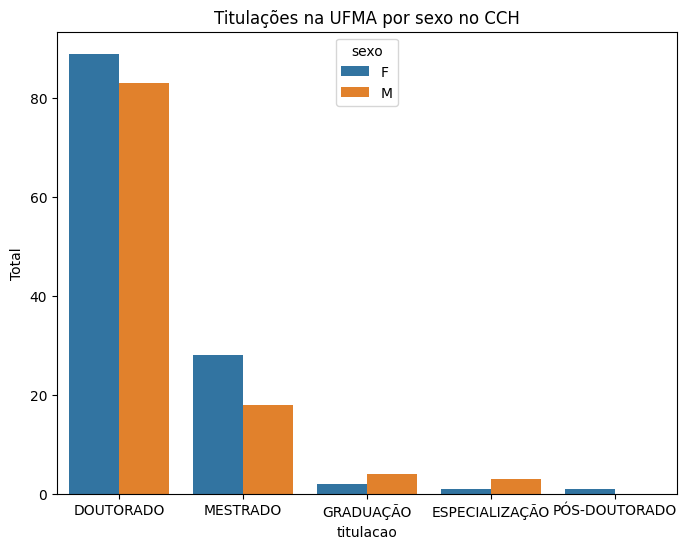

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Titulações na UFMA por sexo no CCH" , size = 12 )

plot = sns.barplot(x = 'titulacao', y = 'Total', data = df_cch_sexo_titulacao, hue='sexo', ax=ax)

plt.show()